In [2]:
import pandas as pd
import numpy as np
from scipy import stats
f = pd.read_csv("train.csv")
f

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
x = f['GrLivArea']
y = f['SalePrice']
f = pd.concat([x, y], axis = 1)
f.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


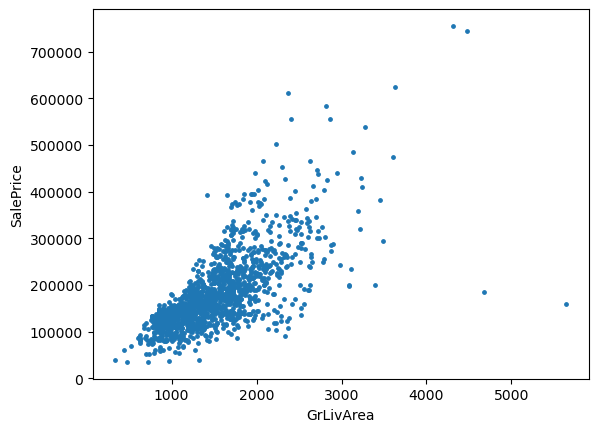

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s = 6)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [5]:
def plot_boxplot(f,ft):
    f.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

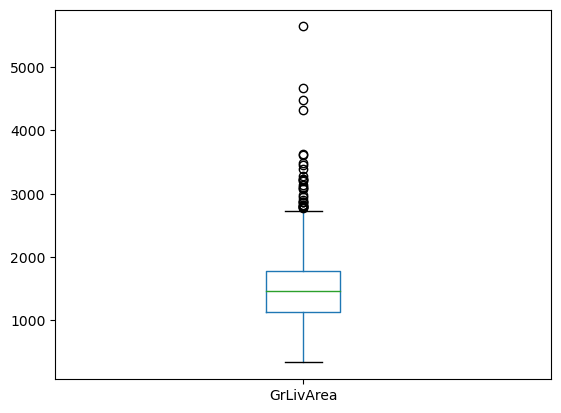

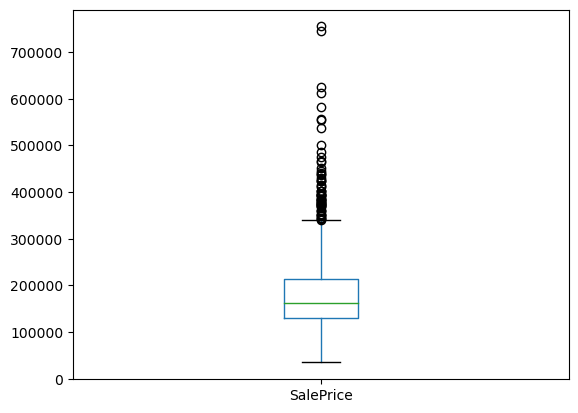

In [6]:
plot_boxplot(f, 'GrLivArea')
plot_boxplot(f, 'SalePrice')

In [7]:
def outliers(f,ft):
    Q1 = f[ft].quantile(0.25)
    Q3 = f[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = f.index[(f[ft] < lower_bound) | (f[ft] > upper_bound)]
    return ls

In [8]:
index_list = []
for new in ['GrLivArea', 'SalePrice']:
    index_list.extend(outliers(f, new))


In [9]:
def remove(f, ls):
    ls = sorted(set(ls))
    f = f.drop(ls)
    return f

In [10]:
f_cleaned = remove(f, index_list)

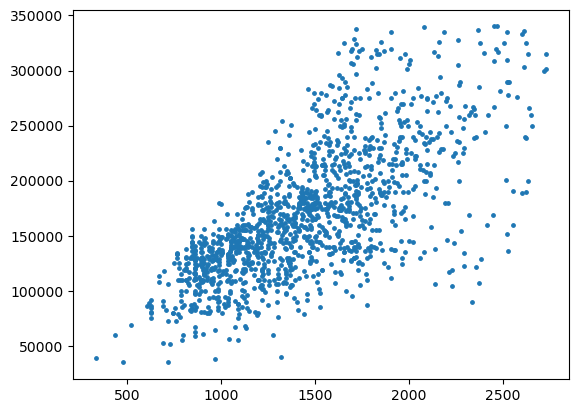

In [11]:
plt.scatter(f_cleaned['GrLivArea'], f_cleaned['SalePrice'], s = 6)


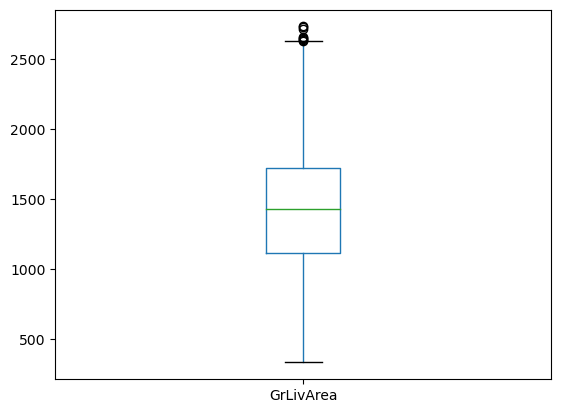

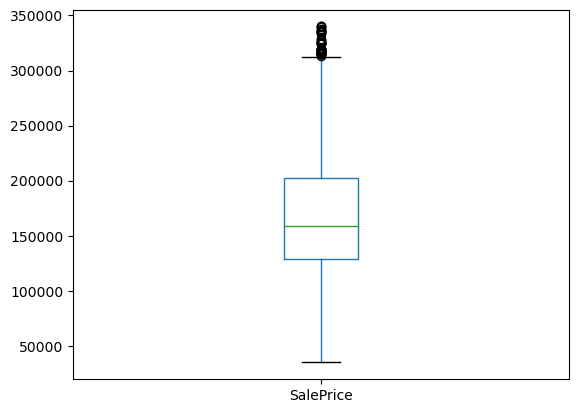

In [12]:
plot_boxplot(f_cleaned, 'GrLivArea')
plot_boxplot(f_cleaned, 'SalePrice')

In [13]:
f_cleaned.to_csv('cleaned.csv', index = False)

In [14]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
f = pd.read_csv("train.csv")
f

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
x = f['1stFlrSF']
y = f['2ndFlrSF']
x = (x-min(x))/(max(x)-min(x))*10
y = (y-min(y))/(max(y)-min(y))*10
f = pd.concat([x, y], axis = 1)
f.head()

,1stFlrSF,2ndFlrSF
0,1.197797,4.135593
1,2.129417,0.000000
2,1.344654,4.193705
3,1.438733,3.661017
4,1.860945,5.099274


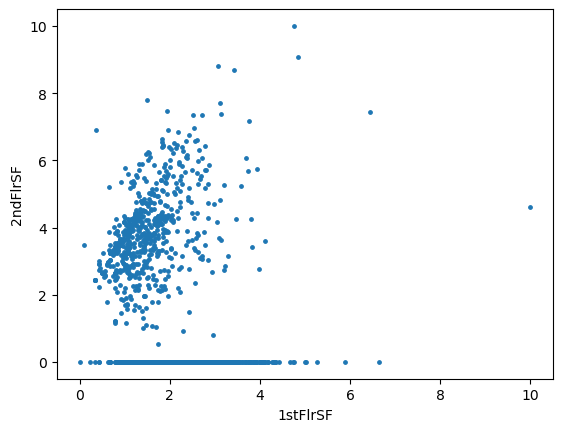

In [16]:
plt.scatter(x,y,s=6)
plt.xlabel('1stFlrSF')
plt.ylabel('2ndFlrSF')
plt.show()

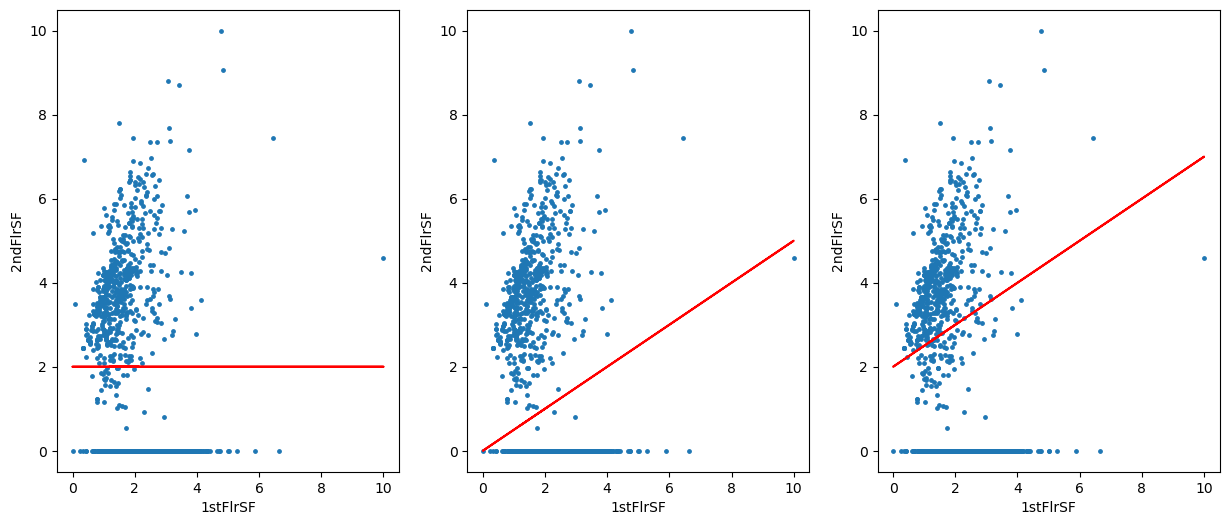

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs[0].scatter (x, y, 6)
axs[0].set_xlabel('1stFlrSF')
axs[0].set_ylabel('2ndFlrSF')
a = 2
b = 0
axs[0].plot(x,a + b * x, color = 'red')


axs[1].scatter(x,y,s=6)
axs[1].set_xlabel('1stFlrSF')
axs[1].set_ylabel('2ndFlrSF')
a = 0
b = 0.5
axs[1].plot(x,a + b * x, color = 'red')


axs[2].scatter(x,y,s=6)
axs[2].set_xlabel('1stFlrSF')
axs[2].set_ylabel('2ndFlrSF')
a = 2
b = 0.5
axs[2].plot(x,a + b * x, color = 'red')


plt.show()

In [18]:
from sklearn.metrics import r2_score
r2_score(x,y)

-6.706849162717362

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
f = pd.read_csv("train.csv")
x = f[['1stFlrSF', '2ndFlrSF']]
y = f['SalePrice']
lm = LinearRegression()
lm.fit(x,y)
lm.coef_
predictions = lm.predict(x)

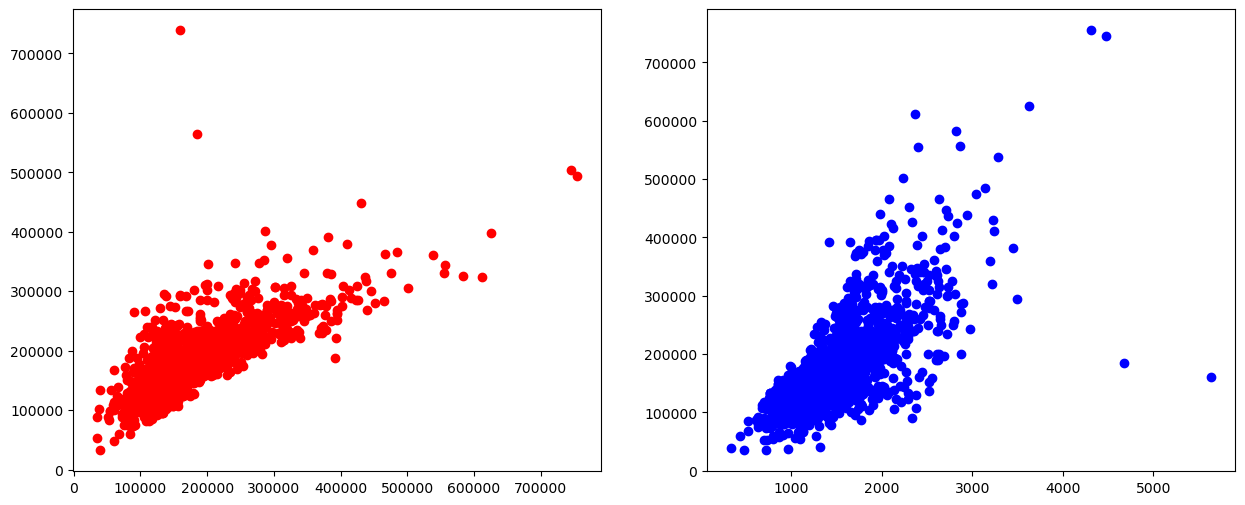

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
f['FloorSpace'] = f['1stFlrSF'] + f['2ndFlrSF']
axs[0].scatter(x = y, y = predictions, color = 'red')
axs[1].scatter(x = f['FloorSpace'] , y = f['SalePrice'], color = 'blue')

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
X = sm.add_constant(x)
reg = sm.OLS(y, X).fit()
f["residuals"] = reg.resid
f.describe()['residuals']

count    1.460000e+03
mean     3.882172e-11
std      5.204022e+04
min     -5.786857e+05
25%     -2.397584e+04
50%      1.164464e+03
75%      2.269238e+04
max      2.872126e+05
Name: residuals, dtype: float64

In [24]:
f = pd.read_csv("censusCrimeClean.csv")
f

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [30]:
numeric_features = f.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['ViolentCrimesPerPop'].sort_values(ascending=False)[:20])

ViolentCrimesPerPop    1.000000
PctIlleg               0.737957
racepctblack           0.631264
pctWPubAsst            0.574665
FemalePctDiv           0.556032
TotalPctDiv            0.552777
MalePctDivorce         0.525407
PctPopUnderPov         0.521877
PctUnemployed          0.504235
PctHousNoPhone         0.488243
PctNotHSGrad           0.483366
PctVacantBoarded       0.482816
PctHousLess3BR         0.474490
NumIlleg               0.471028
PctPersDenseHous       0.452901
NumUnderPov            0.447582
HousVacant             0.421396
PctLess9thGrade        0.411096
PctLargHouseFam        0.383480
NumInShelters          0.375754
Name: ViolentCrimesPerPop, dtype: float64


0.14047323148566115


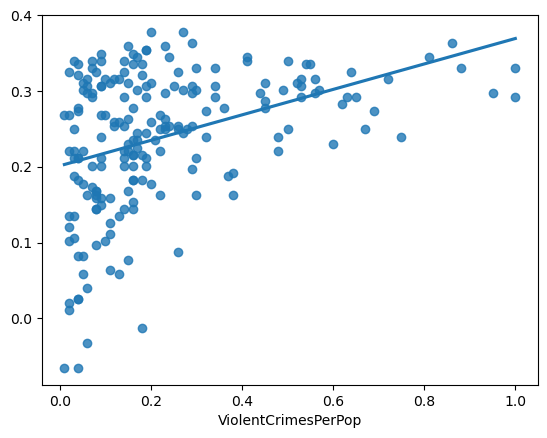

In [35]:
Train_x = f[['medIncome']]
Train_y = f[['ViolentCrimesPerPop']]
x_train = Train_x[:-200]
x_test = Train_x[-200:]
y_train = Train_y[:-200]
y_test = Train_y[-200:]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
sns.regplot(x=y_test,y=y_pred,ci=None);
print(regr.score(x_test,y_test))


In [36]:
x = f[['medIncome', 'NumUnderPov']]
y = f['ViolentCrimesPerPop']

In [37]:
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

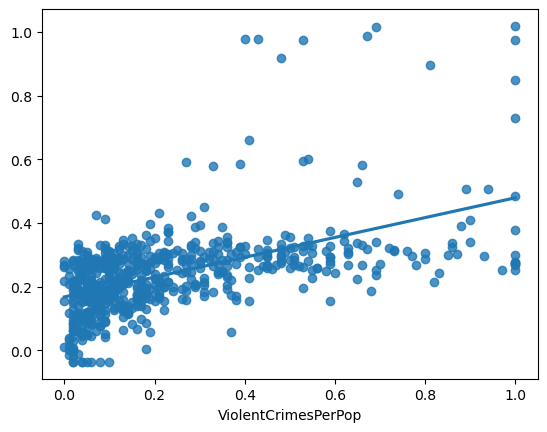

In [39]:
y_pred_mlr= mlr.predict(x_test)
sns.regplot(x=y_test,y=y_pred_mlr,ci=None);

In [53]:
import statsmodels.api as sm
import numpy as np
X = sm.add_constant(f['medIncome'])
model = sm.OLS(f['ViolentCrimesPerPop'], X)
results = model.fit()
results.params


const        0.408460
medIncome   -0.472085
dtype: float64

In [54]:
import statsmodels.api as sm
import numpy as np
X = sm.add_constant(f['medIncome'])
model = sm.OLS(f['ViolentCrimesPerPop'], X).fit()
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.180
Model:                             OLS   Adj. R-squared:                  0.180
Method:                  Least Squares   F-statistic:                     437.2
Date:                 Wed, 16 Nov 2022   Prob (F-statistic):           6.33e-88
Time:                         20:27:00   Log-Likelihood:                 273.77
No. Observations:                 1994   AIC:                            -543.5
Df Residuals:                     1992   BIC:                            -532.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4085      0.009     43.34